In [2]:
import numpy as np
import statsmodels as sm
import pandas as pd
import math
import matplotlib.pyplot as plt
import requests
import json

In [8]:
from itertools import combinations

tokens=['ENS', 'UNI', 'AAVE','MKR', 'OP','ETH']
token_pairs=tokens
print("Your token list: " + str(token_pairs))

res = list(combinations(token_pairs,2))
res = set(res)

print("All possible pairs: " +str(res))

Your token list: ['ENS', 'UNI', 'AAVE', 'MKR', 'OP', 'ETH']
All possible pairs: {('ENS', 'ETH'), ('UNI', 'MKR'), ('AAVE', 'OP'), ('UNI', 'OP'), ('MKR', 'ETH'), ('ENS', 'UNI'), ('AAVE', 'ETH'), ('UNI', 'ETH'), ('ENS', 'AAVE'), ('ENS', 'MKR'), ('ENS', 'OP'), ('MKR', 'OP'), ('OP', 'ETH'), ('UNI', 'AAVE'), ('AAVE', 'MKR')}


2.188337741261796


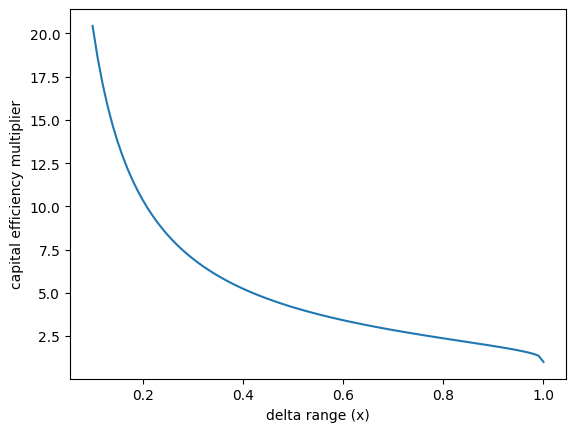

In [56]:
def capital_efficiency(P_a,P_b):
    return (1/(1-((pow(P_a/P_b,.25)))))

delta=.84
print(capital_efficiency(1-delta,1+delta))

x=np.arange(0.1,1.01,0.01)
f=lambda x: capital_efficiency(1-x,1+x)
y=f(x)

plt.xlabel('delta range (x)')
plt.ylabel('capital efficiency multiplier')
plt.plot(x,y)

derivative minimum 84.0 %


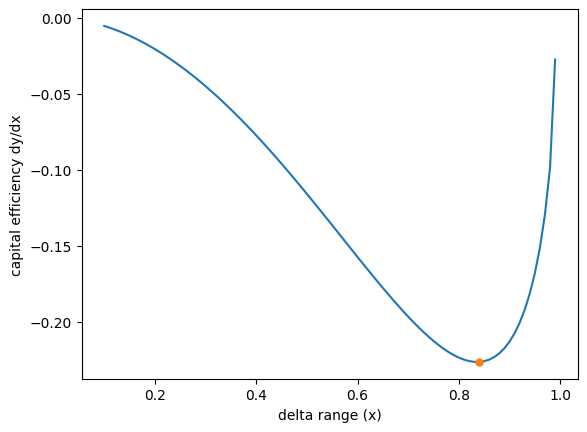

<Figure size 640x480 with 0 Axes>

In [58]:
x_diff=np.diff(x)
y_diff=np.diff(y)
dy_dx=x_diff/y_diff
plt.plot(x[:-1],dy_dx)
plt.plot(x[dy_dx[:-2].argmin()], dy_dx[:-2].min(), marker='o',markersize=5)
print("derivative minimum", round(x[dy_dx[:-2].argmin()]*100,2),'%')
plt.xlabel('delta range (x)')
plt.ylabel('capital efficiency dy/dx')
plt.show()

In [38]:
# Get pools
# ETH/USD: 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640
# ENS/ETH: 0x92560c178ce069cc014138ed3c2f5221ba71f58a
# ETH/MATIC: 0x86f1d8390222a3691c28938ec7404a1661e618e0
# ETH/OP: 0x68f5c0a2de713a54991e01858fd27a3832401849

query = """
{
pools
  ( where: {
    id_in: ["0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640", "0x92560c178ce069cc014138ed3c2f5221ba71f58a", "0x290a6a7460b308ee3f19023d2d00de604bcf5b42"]
  }){
  token0 {
    name
  }
  token1 {
    name
  }
  token0Price
  token1Price
}}

"""

url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'
r = requests.post(url, json={'query': query})
print(r.status_code)
json_data = json.loads(r.text)
print(json_data)

200
{'data': {'pools': [{'token0': {'name': 'Matic Token'}, 'token1': {'name': 'Wrapped Ether'}, 'token0Price': '1366.907071655709579778620319847093', 'token1Price': '0.0007315786279375365710578420670241281'}, {'token0': {'name': 'USD Coin'}, 'token1': {'name': 'Wrapped Ether'}, 'token0Price': '1632.355442687990020600670259907738', 'token1Price': '0.0006126116738112539596718447419673982'}, {'token0': {'name': 'Wrapped Ether'}, 'token1': {'name': 'Ethereum Name Service'}, 'token0Price': '0.01081492991203311986852285104473785', 'token1Price': '92.46476936363317034834249641824414'}]}}


In [44]:
json_data['data']['pools']

[{'token0': {'name': 'Matic Token'},
  'token1': {'name': 'Wrapped Ether'},
  'token0Price': '1366.907071655709579778620319847093',
  'token1Price': '0.0007315786279375365710578420670241281'},
 {'token0': {'name': 'USD Coin'},
  'token1': {'name': 'Wrapped Ether'},
  'token0Price': '1632.355442687990020600670259907738',
  'token1Price': '0.0006126116738112539596718447419673982'},
 {'token0': {'name': 'Wrapped Ether'},
  'token1': {'name': 'Ethereum Name Service'},
  'token0Price': '0.01081492991203311986852285104473785',
  'token1Price': '92.46476936363317034834249641824414'}]